# Trabalho 2 - Funções usadas na resolução dos exercícios


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat


def ler_arquivo_csv(caminho: str = './', nome_arquivo: str = '', separador: str = ";", decimal: str = ".") -> pd.DataFrame:
    return pd.read_csv(caminho + nome_arquivo, sep=separador, decimal=decimal)


def gravar_arquivo_csv(caminho: str = './', nome_arquivo: str = '', dataframe: pd.DataFrame = None, separador: str = ";", decimal: str = ".") -> None:
    dataframe.to_csv(caminho + nome_arquivo, index=False,
                     sep=separador, decimal=decimal)


def apagar_colunas(dataframe: pd.DataFrame, nome_colunas: list[str]) -> pd.DataFrame:
    return dataframe.drop(nome_colunas, axis=1)


def obter_limite_controle(media_dataframe: float, desvio_padrao_dataframe: float, limite_superior: bool) -> float:

    if(limite_superior):
        # limite superior de controle
        lsc = media_dataframe + desvio_padrao_dataframe
        print("Limite Superior de Controle = ", lsc)
        return lsc
    else:
        # limite inferior de controle
        lic = media_dataframe - desvio_padrao_dataframe
        print("Limite Inferior de Controle = ", lic)
        return lic


def gerar_grafico_controle(dataframe: pd.DataFrame, dataframe_indices: list[str], rotulo_eixo_x: str, rotulo_eixo_y: str, titulo_grafico: str):

    # médias
    medias = dataframe.mean(numeric_only=True, skipna=True, axis=0)
    media_geral = medias.mean()
    print("Média Geral = ", media_geral)

    # desvio padrão anuais
    desvios_padrao = dataframe.std(numeric_only=True, skipna=True, axis=0)
    desvio_padrao_geral = desvios_padrao.std()
    print("Desvio Padrão Geral = ", desvio_padrao_geral)

    # limite superior de controle
    lsc = obter_limite_controle(media_dataframe=media_geral,
                                desvio_padrao_dataframe=desvio_padrao_geral * 2, limite_superior=True)

    # limite inferior de controle
    lic = obter_limite_controle(media_dataframe=media_geral,
                                desvio_padrao_dataframe=desvio_padrao_geral * 2, limite_superior=False)

    # nome das colunas
    eixo_x = dataframe.columns

    lsc_vetor = [lsc] * len(eixo_x)
    lic_vetor = [lic] * len(eixo_x)
    media_vetor = [media_geral] * len(eixo_x)

    plt.plot(eixo_x, lsc_vetor, 'r--', label='Limite Superior de Controle')
    plt.plot(eixo_x, media_vetor, 'b--', label='Média Geral')
    plt.plot(eixo_x, lic_vetor, 'r--', label='Limite Inferior de Controle')
    plt.plot(eixo_x, medias, 'g-', label='Média Anual')

    for linha, coluna, in dataframe.iterrows():
        # transformar coluna em array
        coluna_array: pd.Series = coluna.values
        # pegar o nome do país pelo índice da tabela original
        nome_pais: str = dataframe_indices[linha]
        plt.plot(eixo_x, coluna_array, label=nome_pais)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5, forward=True)
    plt.grid()
    plt.title(titulo_grafico)
    plt.xlabel(rotulo_eixo_x)
    plt.ylabel(rotulo_eixo_y)
    plt.tick_params(rotation=45)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    plt.show()


def obter_elementos_saem_faixa_controle(dataframe: pd.DataFrame, limite_superior: bool, valor_limite: float) -> pd.DataFrame:
    # monta a expressao conforme o tipo de limite, superior ou inferior
    expressao = lambda x: x >= valor_limite if limite_superior else x <= valor_limite
    
    # retorna um dataframe de booleanos apenas nos valores existentes, mantendo NAN nas posições vazias
    fora_faixa_controle = dataframe.applymap( expressao, na_action='ignore')

    return fora_faixa_controle
   
def exibir_saida_faixa_controle(dataframe: pd.DataFrame, dataframe_indices: list[str], limite_superior: bool):

    texto = 'acima' if limite_superior else 'abaixo'

    for linha, coluna in dataframe.iterrows():
        nome_pais: str = dataframe_indices[linha]
        fora_faixa = coluna.isin([limite_superior]).sum()
        periodo_fora_faixa: pd.Series = coluna[coluna == limite_superior].index
        if(fora_faixa > 0):
            print(
                f"{nome_pais} ficou {texto} da faixa de controle {fora_faixa} vezes, sendo os anos de:")
            display(periodo_fora_faixa.values)
        else:
            display(
                f"{nome_pais} não ficou {texto} da faixa de controle nenhuma vez.")


## Atividade 1

Crie um dataset que envolva apenas o indicador GDP e persista em um arquivo, sem as colunas "Indicator Name" e "Indicator Code"

In [111]:
import pandas as pd

df_dados = ler_arquivo_csv(
    nome_arquivo='dataset_bancomundial.csv', decimal=',')

# filtrar ocorrencias de um único termo em uma coluna
filtro = 'GDP per capita'

# filtrando apenas as linhas que contém o critério do filtro na coluna Indicator Name
df_gpd = df_dados[df_dados['Indicator Name'].str.contains(filtro)]

print("Antes de remover haviam essas colunas.")
display(df_gpd.head(0))

# apagar colunas do dataframe
df_gpd = apagar_colunas(dataframe=df_gpd, nome_colunas=[
                        'Indicator Name', 'Indicator Code', 'index'])

df_gpd = df_gpd.reset_index(drop=True)

print("Depois de removido há as seguintes colunas.")
display(df_gpd.head(0))

# gravando em um novo arquivo
gravar_arquivo_csv(nome_arquivo='dataset_gpd_ex1.csv', dataframe=df_gpd)


Antes de remover haviam essas colunas.


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


Depois de removido há as seguintes colunas.


,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


## Atividade 2
Selecione os países da América do Sul e crie um novo dataset, persistindo em arquivo

In [112]:
df_paises = ler_arquivo_csv(
    nome_arquivo='dataset_bancomundial_paises.csv', decimal=',')

filtro_paises_sul_americanos = ['ARG', 'BRA', 'BOL',  'CHL',
                                'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

# filtrar ocorrencias de varios termos em uma coluna
df_paises_sul_americanos = df_paises.query(
    "`Country Code` in @filtro_paises_sul_americanos")

# apagar colunas do dataframe
df_paises_sul_americanos = apagar_colunas(df_paises_sul_americanos, ['index'])

df_paises_sul_americanos = df_paises_sul_americanos.reset_index(drop=True)

# criando arquivo com dataframe
gravar_arquivo_csv(nome_arquivo='dataset_paises_sul_americanos_ex2.csv',
                   dataframe=df_paises_sul_americanos)

df_paises_sul_americanos


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,The base year has changed to 2004.,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,AR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2013.0,2011.0
1,BOL,Bolivia,Bolivia,Plurinational State of Bolivia,BO,Bolivian Boliviano,NaN,Latin America & Caribbean,Lower middle income; based on FY13 income clas...,BO,...,Consolidated central government,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2008","Integrated household survey (IHS), 2012",NaN,2013,NaN,2013.0,2000.0
2,BRA,Brazil,Brazil,Federative Republic of Brazil,BR,Brazilian real,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,BR,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",NaN,2006,2011.0,2013.0,2010.0
3,CHL,Chile,Chile,Republic of Chile,CL,Chilean peso,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,CL,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2012,NaN,"Integrated household survey (IHS), 2011",Yes,2007,NaN,2013.0,2006.0
4,COL,Colombia,Colombia,Republic of Colombia,CO,Colombian peso,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,CO,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2006,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",NaN,2013,2011.0,2013.0,2008.0
5,ECU,Ecuador,Ecuador,Republic of Ecuador,EC,U.S. dollar,National accounts have been revised from 1965 ...,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,EC,...,Budgetary central government,Special Data Dissemination Standard (SDDS),2010,"Reproductive Health Survey (RHS), 2004","Integrated household survey (IHS), 2013",NaN,2013/15,2008.0,2013.0,2005.0
6,GUY,Guyana,Guyana,Co-operative Republic of Guyana,GY,Guyana dollar,"In 2010, the Bureau of Statistics introduced a...",Latin America & Caribbean,Lower middle income; based on FY13 income clas...,GY,...,NaN,General Data Dissemination System (GDDS),2012,"Multiple Indicator Cluster Survey (MICS), 2014","Integrated household survey (IHS), 1998",NaN,NaN,NaN,2013.0,2010.0
7,PRY,Paraguay,Paraguay,Republic of Paraguay,PY,Paraguayan guarani,National accounts data have been revised from ...,Latin America & Caribbean,Lower middle income; based on FY13 income clas...,PY,...,Consolidated central government,General Data Dissemination System (GDDS),2012,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2013",NaN,2008,2002.0,2013.0,2012.0
8,PER,Peru,Peru,Republic of Peru,PE,Peruvian new sol,The new base year is 2007.,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,PE,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2007,Continuous Demographic and Health Survey (DHS)...,"Integrated household survey (IHS), 2013",NaN,2012,2011.0,2013.0,2008.0
9,SUR,Suriname,Suriname,Republic of Suriname,SR,Suriname dollar,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,SR,...,Budgetary central government,General Data Dissemination System (GDDS),2012,"Multiple Indicator Cluster Survey (MICS), 2010","Expenditure survey/budget survey (ES/BS), 1999",Yes,2008,2004.0,2011.0,2006.0


## Atividade 3
 Crie um único gráfico de controle, considerando a média e uma amplitude de 2 vezes o desvio padrão da para a série com o GDP para todos os países da América do Sul; o propósito é avaliar a média histórica do GDP para os países mencionados, no período 1960-2013; no eixo x do gráfico constará o ano (1960-2013) e o eixo y terá a média do GDP daquele ano, considerando todos os países; o desvio padrão será calculado a partir da média histórica do GDP para todos os países da América do Sul;

Média Geral =  3131.7418649434762
Desvio Padrão Geral =  294.8354550437983
Limite Superior de Controle =  3721.4127750310727
Limite Inferior de Controle =  2542.07095485588


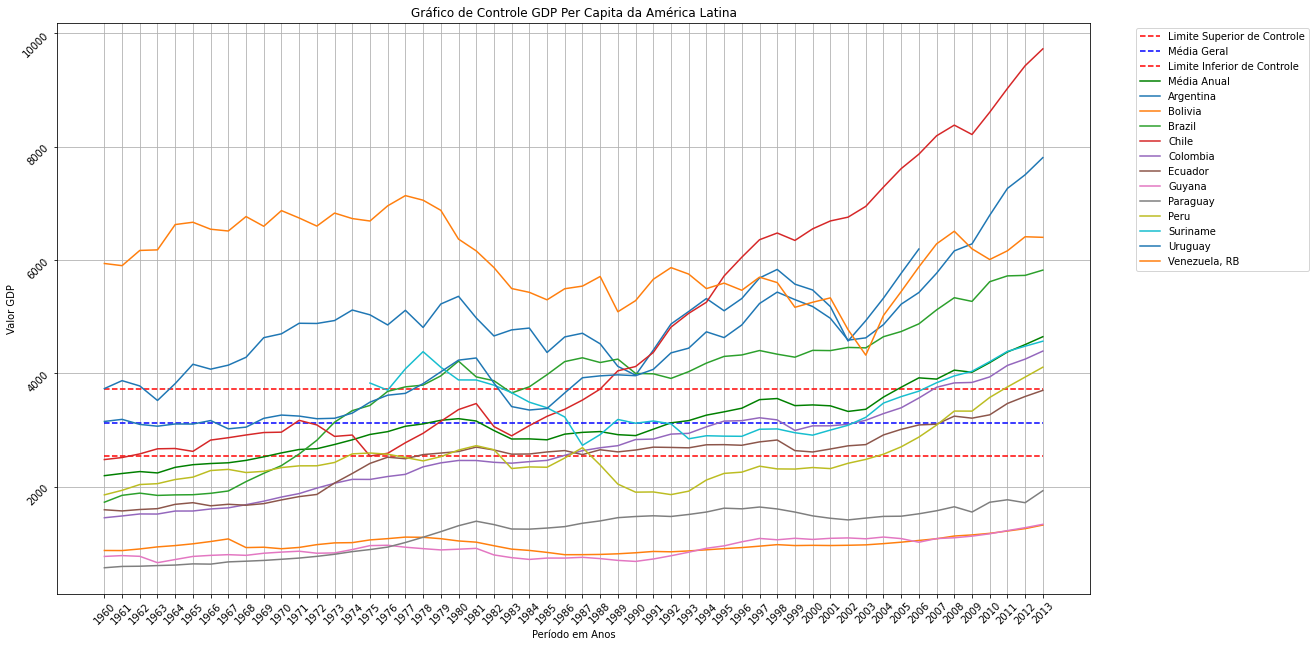

In [113]:
# separando apenas o nome abreviado dos países
filtro_cod_sul_americanos = df_paises_sul_americanos['Country Code']

# filtrando apenas as linhas que contém o critério do filtro na coluna Country Code
df_registros_paises_sul_americanos = df_gpd.query(
    "`Country Code` in @filtro_cod_sul_americanos")

# extraindo o nome dos países dos dados
nome_paises = df_registros_paises_sul_americanos['Country Name']
cod_paises_original = df_registros_paises_sul_americanos['Country Code']

# apagando colunas para deixar apenas colunas numéricas
df_registros_paises_sul_americanos = apagar_colunas(dataframe=df_registros_paises_sul_americanos,
                                                    nome_colunas=[
                                                        'Country Name', 'Country Code'])

gerar_grafico_controle(
    dataframe = df_registros_paises_sul_americanos,
    dataframe_indices = nome_paises,
    rotulo_eixo_x = 'Período em Anos',
    rotulo_eixo_y = 'Valor GDP',
    titulo_grafico = 'Gráfico de Controle GDP Per Capita da América Latina')


## Exercício 4
Identifique os anos e os países que se encontram fora da faixa de controle;

In [114]:

# médias
medias = df_registros_paises_sul_americanos.mean(
    numeric_only=True, skipna=True, axis=0)
media_geral = medias.mean()

# desvio padrão anuais
desvios_padrao = df_registros_paises_sul_americanos.std(
    numeric_only=True, skipna=True, axis=0)
desvio_padrao_geral = desvios_padrao.std()

# limite superior de controle
limite_superior = obter_limite_controle(media_dataframe=media_geral,
                                        desvio_padrao_dataframe=desvio_padrao_geral * 2, limite_superior=True)

# limite inferior de controle
limite_inferior = obter_limite_controle(media_dataframe=media_geral,
                                        desvio_padrao_dataframe=desvio_padrao_geral * 2, limite_superior=False)

# separando quem saiu da faixa de controle superior e inferior


fora_faixa_controle_superior = obter_elementos_saem_faixa_controle(
    dataframe=df_registros_paises_sul_americanos,
    limite_superior=True,
    valor_limite=limite_superior)

fora_faixa_controle_inferior = obter_elementos_saem_faixa_controle(
    dataframe=df_registros_paises_sul_americanos,
    limite_superior=False,
    valor_limite=limite_inferior)

exibir_saida_faixa_controle(dataframe=fora_faixa_controle_superior,
                            dataframe_indices=nome_paises, limite_superior=True)

print("-----------------------------------------------------")
print("\nLimite Inferior Agora\n")
print("-----------------------------------------------------")


exibir_saida_faixa_controle(dataframe=fora_faixa_controle_superior,
                            dataframe_indices=nome_paises, limite_superior=False)


Limite Superior de Controle =  3721.4127750310727
Limite Inferior de Controle =  2542.07095485588
Argentina ficou acima da faixa de controle 46 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006'], dtype=object)

'Bolivia não ficou acima da faixa de controle nenhuma vez.'

Brazil ficou acima da faixa de controle 36 vezes, sendo os anos de:


array(['1977', '1978', '1979', '1980', '1981', '1982', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'], dtype=object)

Chile ficou acima da faixa de controle 26 vezes, sendo os anos de:


array(['1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013'], dtype=object)

Colombia ficou acima da faixa de controle 7 vezes, sendo os anos de:


array(['2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype=object)

'Ecuador não ficou acima da faixa de controle nenhuma vez.'

'Guyana não ficou acima da faixa de controle nenhuma vez.'

'Paraguay não ficou acima da faixa de controle nenhuma vez.'

Peru ficou acima da faixa de controle 3 vezes, sendo os anos de:


array(['2011', '2012', '2013'], dtype=object)

Suriname ficou acima da faixa de controle 14 vezes, sendo os anos de:


array(['1975', '1977', '1978', '1979', '1980', '1981', '1982', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

Uruguay ficou acima da faixa de controle 32 vezes, sendo os anos de:


array(['1978', '1979', '1980', '1981', '1982', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype=object)

Venezuela, RB ficou acima da faixa de controle 54 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

-----------------------------------------------------

Limite Inferior Agora

-----------------------------------------------------
Argentina ficou abaixo da faixa de controle 1 vezes, sendo os anos de:


array(['1963'], dtype=object)

Bolivia ficou abaixo da faixa de controle 54 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

Brazil ficou abaixo da faixa de controle 18 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1983'], dtype=object)

Chile ficou abaixo da faixa de controle 28 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987'], dtype=object)

Colombia ficou abaixo da faixa de controle 47 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006'],
      dtype=object)

Ecuador ficou abaixo da faixa de controle 54 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

Guyana ficou abaixo da faixa de controle 54 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

Paraguay ficou abaixo da faixa de controle 54 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

Peru ficou abaixo da faixa de controle 51 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010'], dtype=object)

Suriname ficou abaixo da faixa de controle 25 vezes, sendo os anos de:


array(['1976', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006'], dtype=object)

Uruguay ficou abaixo da faixa de controle 22 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1983', '1984', '1985', '1986'], dtype=object)

'Venezuela, RB não ficou abaixo da faixa de controle nenhuma vez.'

## Exercício 5

Considerando os países "Brasil", "Uruguai", "Argentina" e "Paraguai", assim denomidados de países do ConeSul, crie um dataset que envolva apenas o indicador GDP e persista em um arquivo.

In [115]:
filtro_paises_conesul = ['ARG', 'BRA', 'PRY', 'URY']

# filtrar ocorrencias de varios termos em uma coluna
df_paises_conesul = df_paises.query("`Country Code` in @filtro_paises_conesul")

display(df_paises_conesul)

# criando arquivo com dataframe
gravar_arquivo_csv(dataframe=df_paises_conesul,
                   nome_arquivo='dataset_paises_conesul_ex5.csv')

df_paises_conesul.head(4)


,index,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
6,6,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,The base year has changed to 2004.,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2013.0,2011.0
24,24,BRA,Brazil,Brazil,Federative Republic of Brazil,BR,Brazilian real,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",NaN,2006,2011.0,2013.0,2010.0
152,152,PRY,Paraguay,Paraguay,Republic of Paraguay,PY,Paraguayan guarani,National accounts data have been revised from ...,Latin America & Caribbean,Lower middle income; based on FY13 income clas...,...,Consolidated central government,General Data Dissemination System (GDDS),2012,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2013",NaN,2008,2002.0,2013.0,2012.0
207,207,URY,Uruguay,Uruguay,Oriental Republic of Uruguay,UY,Uruguayan peso,"In 2011, the Central Bank revised national acc...",Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2012/13","Integrated household survey (IHS), 2013",Yes,2011,2009.0,2013.0,2000.0


,index,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
6,6,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,The base year has changed to 2004.,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2013.0,2011.0
24,24,BRA,Brazil,Brazil,Federative Republic of Brazil,BR,Brazilian real,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",NaN,2006,2011.0,2013.0,2010.0
152,152,PRY,Paraguay,Paraguay,Republic of Paraguay,PY,Paraguayan guarani,National accounts data have been revised from ...,Latin America & Caribbean,Lower middle income; based on FY13 income clas...,...,Consolidated central government,General Data Dissemination System (GDDS),2012,"Reproductive Health Survey (RHS), 2008","Integrated household survey (IHS), 2013",NaN,2008,2002.0,2013.0,2012.0
207,207,URY,Uruguay,Uruguay,Oriental Republic of Uruguay,UY,Uruguayan peso,"In 2011, the Central Bank revised national acc...",Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2012/13","Integrated household survey (IHS), 2013",Yes,2011,2009.0,2013.0,2000.0


## Exercício 6

Crie um gráfico de controle, considerando a média e uma amplitude de 2 vezes o desvio padrão da série com o GDP para todos os países do ConeSul, com a mesma abordagem descrita no item 3;

Média Geral =  3530.0188826652775
Desvio Padrão Geral =  405.7032948673396
Limite Superior de Controle =  4341.425472399957
Limite Inferior de Controle =  2718.6122929305984


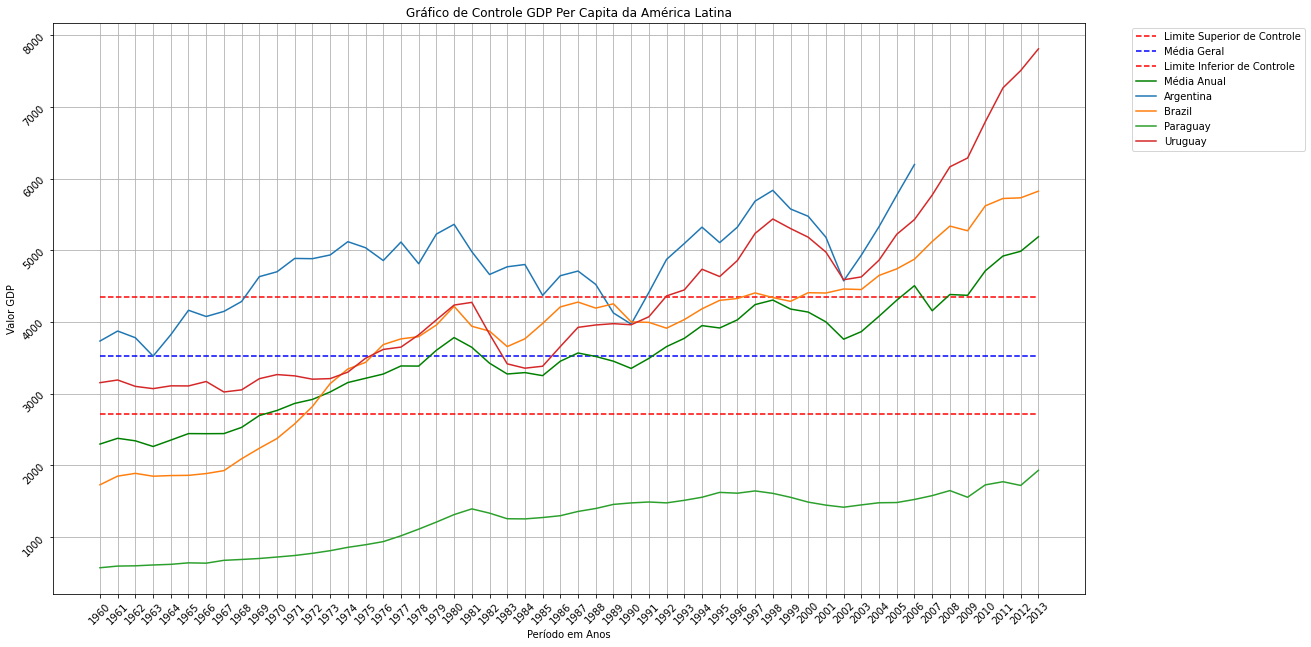

In [116]:
# separando apenas o nome abreviado dos países
filtro_cod_conesul = df_paises_conesul['Country Code']

# filtrando apenas as linhas que contém o critério do filtro na coluna Country Code
df_registros_paises_conesul = df_gpd.query(
    "`Country Code` in @filtro_cod_conesul")

# extraindo o nome dos países dos dados
nome_paises = df_registros_paises_conesul['Country Name']
cod_paises_original = df_registros_paises_conesul['Country Code']

# apagando colunas para deixar apenas colunas numéricas
df_registros_paises_conesul = apagar_colunas(dataframe=df_registros_paises_conesul,
                                                    nome_colunas=[
                                                        'Country Name', 'Country Code'])

gerar_grafico_controle(
    dataframe = df_registros_paises_conesul,
    dataframe_indices = nome_paises,
    rotulo_eixo_x = 'Período em Anos',
    rotulo_eixo_y = 'Valor GDP',
    titulo_grafico = 'Gráfico de Controle GDP Per Capita da América Latina')



## Exercício 7
Identifique os anos e os países que se encontram foram da faixa de controle

In [117]:

# médias
medias = df_registros_paises_conesul.mean(
    numeric_only=True, skipna=True, axis=0)
media_geral = medias.mean()

# desvio padrão anuais
desvios_padrao = df_registros_paises_conesul.std(
    numeric_only=True, skipna=True, axis=0)
desvio_padrao_geral = desvios_padrao.std()

# limite superior de controle
limite_superior = obter_limite_controle(media_dataframe=media_geral,
                                        desvio_padrao_dataframe=desvio_padrao_geral * 2, limite_superior=True)

# limite inferior de controle
limite_inferior = obter_limite_controle(media_dataframe=media_geral,
                                        desvio_padrao_dataframe=desvio_padrao_geral * 2, limite_superior=False)

# separando quem saiu da faixa de controle superior e inferior

fora_faixa_controle_superior = obter_elementos_saem_faixa_controle(
    dataframe=df_registros_paises_conesul,
    limite_superior=True,
    valor_limite=limite_superior)

fora_faixa_controle_inferior = obter_elementos_saem_faixa_controle(
    dataframe=df_registros_paises_conesul,
    limite_superior=False,
    valor_limite=limite_inferior)

exibir_saida_faixa_controle(dataframe=fora_faixa_controle_superior,
                            dataframe_indices=nome_paises, limite_superior=True)

print("-----------------------------------------------------")
print("\nLimite Inferior Agora\n")
print("-----------------------------------------------------")


exibir_saida_faixa_controle(dataframe=fora_faixa_controle_superior,
                            dataframe_indices=nome_paises, limite_superior=False)


Limite Superior de Controle =  4341.425472399957
Limite Inferior de Controle =  2718.6122929305984
Argentina ficou acima da faixa de controle 36 vezes, sendo os anos de:


array(['1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006'], dtype=object)

Brazil ficou acima da faixa de controle 15 vezes, sendo os anos de:


array(['1997', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype=object)

'Paraguay não ficou acima da faixa de controle nenhuma vez.'

Uruguay ficou acima da faixa de controle 22 vezes, sendo os anos de:


array(['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

-----------------------------------------------------

Limite Inferior Agora

-----------------------------------------------------
Argentina ficou abaixo da faixa de controle 11 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1989', '1990'], dtype=object)

Brazil ficou abaixo da faixa de controle 39 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1998', '1999'],
      dtype=object)

Paraguay ficou abaixo da faixa de controle 54 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013'], dtype=object)

Uruguay ficou abaixo da faixa de controle 32 vezes, sendo os anos de:


array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991'],
      dtype=object)

## Exercício 8
Descreva as estatísticas sobre o indicador GDP para os países da América do Sul, com uma tabela que contenha o número de medidas válidas, o número de medidas ausentes, a média, o mínimo, o máximo, a mediana, o desvio padrão e a variância do GDP por país

In [118]:
medias = []
desvios = []
minimos = []
maximos = []
medianas = []
variancia = []
validas = ausentes = []
ausentes = []
for indice_linha, coluna in df_registros_paises_sul_americanos.iterrows():
    dados_pais: pd.Series = coluna.to_frame() 
    
    medias.append(dados_pais.mean(numeric_only=True, skipna=True).values[0])
    desvios.append(dados_pais.std(numeric_only=True, skipna=True).values[0])
    minimos.append(dados_pais.min(numeric_only=True, skipna=True).values[0])
    maximos.append(dados_pais.max(numeric_only=True, skipna=True).values[0])
    medianas.append(dados_pais.median(numeric_only=True, skipna=True).values[0])
    variancia.append(dados_pais.var(numeric_only=True, skipna=True).values[0])
    ausentes.append(dados_pais.isna().sum().values[0])
    validas.append(dados_pais.shape[0] - dados_pais.isna().sum(axis=0).values[0])

dados = pd.DataFrame({'Países': filtro_cod_sul_americanos ,'Médias': medias,  'Desvios': desvios, 'Mínimos': minimos, 'Máximos' : maximos, 'Medianas': medianas, 'Variância': variancia, 'Válidas': validas, 'Ausentes': ausentes })

display(dados)

,Países,Médias,Desvios,Mínimos,Máximos,Medianas,Variância,Válidas,Ausentes
0,ARG,4790.404661,603.273175,3522.337065,6195.384942,4855.354103,3.639385e+05,47,7
1,BOL,980.230419,117.342266,799.950086,1323.124571,963.695207,1.376921e+04,54,0
2,BRA,3791.851543,1142.202778,1726.566347,5823.043784,3996.243028,1.304627e+06,54,0
3,CHL,4737.001266,2236.816807,2479.185118,9728.481224,3498.735159,5.003349e+06,54,0
4,COL,2654.812012,787.063610,1452.070326,4394.066614,2594.982776,6.194691e+05,54,0
5,ECU,2511.124108,551.126518,1572.431900,3700.526148,2629.246711,3.037404e+05,54,0
6,GUY,913.797234,168.069157,658.976280,1336.341400,887.478025,2.824724e+04,54,0
7,PRY,1229.303304,392.862647,569.512739,1929.094840,1372.977508,1.543411e+05,54,0
8,PER,2495.336615,501.221096,1855.983158,4109.596136,2365.303708,2.512226e+05,54,0
9,SUR,3503.401865,532.028103,2730.513671,4568.685095,3476.253539,2.830539e+05,39,15


## Exercício 9
Construa um boxplot que relacione o indicador GDP no período 1960-2013, para os países do ConeSul, no período 1960-2013.

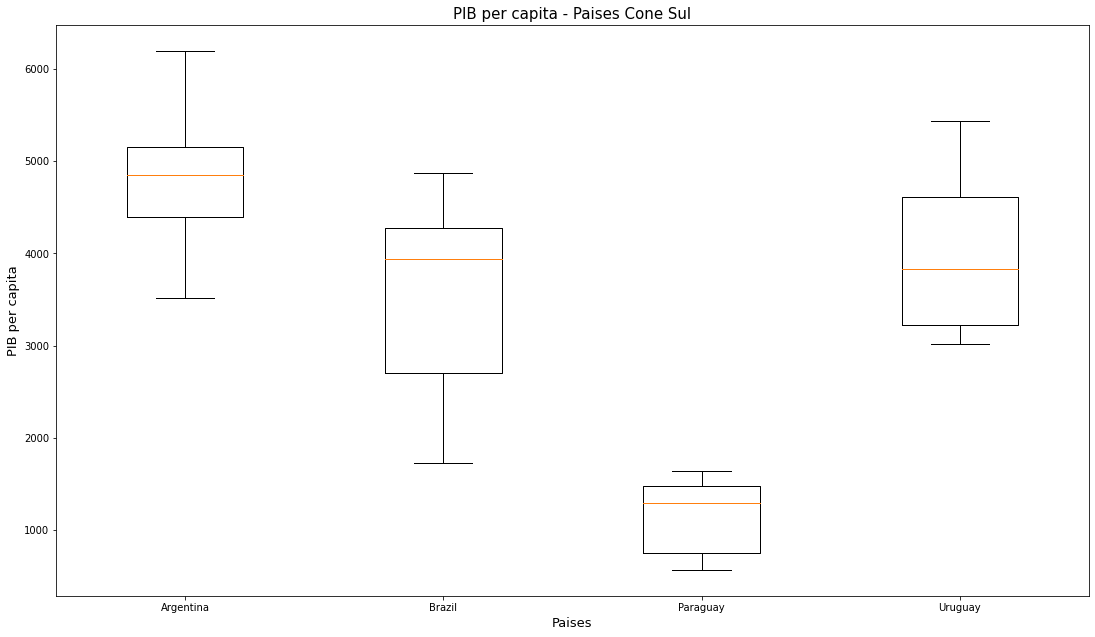

In [119]:
nomes_colunas: list[str] = df_registros_paises_conesul.columns

data = []

dataframe =  df_registros_paises_conesul.dropna(axis = 1)

for indice, linha in dataframe.iterrows():
    dados_pais = linha.values
    data.append(dados_pais)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title("PIB per capita - Paises Cone Sul", fontsize=15)
plt.xlabel("Paises", fontsize=13)
plt.ylabel("PIB per capita", fontsize=13)
ax.boxplot(data, labels=nome_paises)
plt.show()
